In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize

In [3]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Safiuddin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Safiuddin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv('data/reviews_Baby_5_final_dataset.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.0,1.0,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.0,1.0,1
2,A2SYNL4YX73KNY,097293751X,"R. Davidson ""Jrdpa""","[2, 2]",2,2,"I like this log, but think it would work bette...",3,Needs clearer AM & PM,1369008000,"05 20, 2013",0,0,288,59,2,4.0,1.0,1
3,A2Q2A6JKY95RTP,097293751X,R. Garrelts,"[2, 2]",2,2,My wife and I have a six month old baby boy an...,3,Expensive and Somewhat Limited Format,1381968000,"10 17, 2013",0,0,2959,505,9,4.0,1.0,1
4,A21I33AWNOWMK8,9729375011,EmilyS,"[1, 2]",1,2,I have used this book since my son was born. ...,5,Great product!,1364256000,"03 26, 2013",0,0,595,117,0,4.5,0.5,0


In [6]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 56950 rows and 19 columns


In [7]:
df = df[['reviewText']]
df.head()

,reviewText
0,This book is perfect! I'm a first time new mo...
1,I use this so that our babysitter (grandma) ca...
2,"I like this log, but think it would work bette..."
3,My wife and I have a six month old baby boy an...
4,I have used this book since my son was born. ...


In [11]:
df.iloc[0].values[0]

"This book is perfect!  I'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  Definitely would recommend this for new moms.  Plus it's small enough that I throw in the diaper back for doctor visits."

In [12]:
df['word_tokens'] = df['reviewText'].apply(word_tokenize)
df.head()

,reviewText,word_tokens
0,This book is perfect! I'm a first time new mo...,"[This, book, is, perfect, !, I, 'm, a, first, ..."
1,I use this so that our babysitter (grandma) ca...,"[I, use, this, so, that, our, babysitter, (, g..."
2,"I like this log, but think it would work bette...","[I, like, this, log, ,, but, think, it, would,..."
3,My wife and I have a six month old baby boy an...,"[My, wife, and, I, have, a, six, month, old, b..."
4,I have used this book since my son was born. ...,"[I, have, used, this, book, since, my, son, wa..."


In [14]:
df['word_tokens'].iloc[0]

['This',
 'book',
 'is',
 'perfect',
 '!',
 'I',
 "'m",
 'a',
 'first',
 'time',
 'new',
 'mom',
 ',',
 'and',
 'this',
 'book',
 'made',
 'it',
 'so',
 'easy',
 'to',
 'keep',
 'track',
 'of',
 'feedings',
 ',',
 'diaper',
 'changes',
 ',',
 'sleep',
 '.',
 'Definitely',
 'would',
 'recommend',
 'this',
 'for',
 'new',
 'moms',
 '.',
 'Plus',
 'it',
 "'s",
 'small',
 'enough',
 'that',
 'I',
 'throw',
 'in',
 'the',
 'diaper',
 'back',
 'for',
 'doctor',
 'visits',
 '.']

In [15]:
from nltk.probability import FreqDist
df['freq_dist'] = df['word_tokens'].apply(FreqDist)

In [16]:
df['freq_dist'].iloc[0]

FreqDist({',': 3, '.': 3, 'book': 2, 'I': 2, 'new': 2, 'this': 2, 'it': 2, 'diaper': 2, 'for': 2, 'This': 1, ...})

In [17]:
df['most_common'] = df['freq_dist'].apply(lambda x: x.most_common(15))
df.head()

,reviewText,word_tokens,freq_dist,most_common
0,This book is perfect! I'm a first time new mo...,"[This, book, is, perfect, !, I, 'm, a, first, ...","{'This': 1, 'book': 2, 'is': 1, 'perfect': 1, ...","[(,, 3), (., 3), (book, 2), (I, 2), (new, 2), ..."
1,I use this so that our babysitter (grandma) ca...,"[I, use, this, so, that, our, babysitter, (, g...","{'I': 4, 'use': 1, 'this': 3, 'so': 2, 'that':...","[(., 8), (we, 8), (the, 6), (a, 5), (I, 4), (a..."
2,"I like this log, but think it would work bette...","[I, like, this, log, ,, but, think, it, would,...","{'I': 1, 'like': 1, 'this': 1, 'log': 1, ',': ...","[(., 3), (hours, 2), (a, 2), (in, 2), (the, 2)..."
3,My wife and I have a six month old baby boy an...,"[My, wife, and, I, have, a, six, month, old, b...","{'My': 1, 'wife': 2, 'and': 15, 'I': 5, 'have'...","[(--, 40), (a, 20), (the, 19), (., 16), (and, ..."
4,I have used this book since my son was born. ...,"[I, have, used, this, book, since, my, son, wa...","{'I': 5, 'have': 1, 'used': 1, 'this': 3, 'boo...","[(., 7), (I, 5), (to, 5), (his, 5), (and, 4), ..."


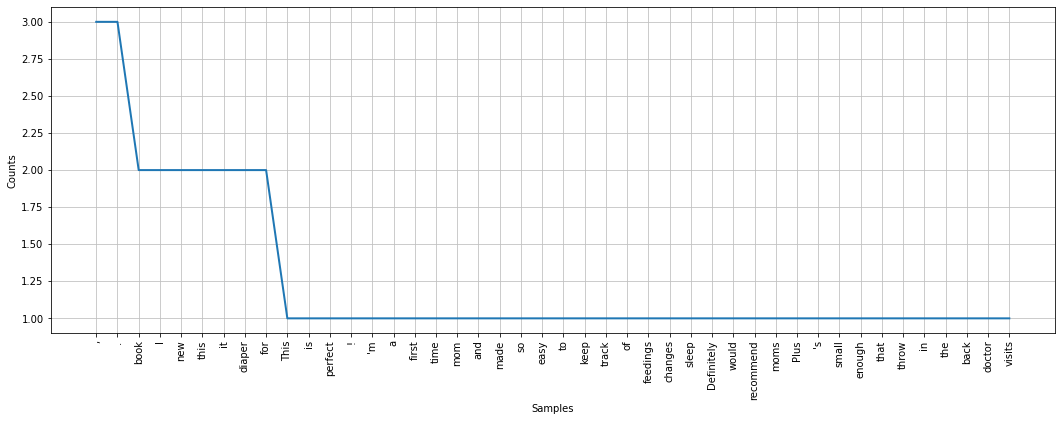

In [18]:
plt.figure(figsize=(18, 6))
df['freq_dist'].iloc[0].plot(cumulative=False)
plt.show();

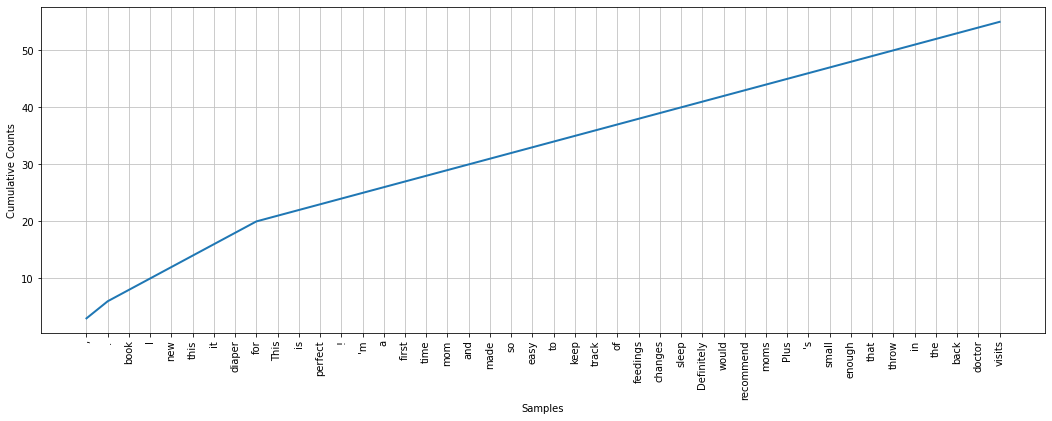

In [19]:
plt.figure(figsize=(18, 6))
df['freq_dist'].iloc[0].plot(cumulative=True)
plt.show();

In [20]:
import re, string, unicodedata
import inflect

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
df['text_lower'] = df['reviewText'].apply(lambda x: x.lower())
df['text_lower'].iloc[0]

"this book is perfect!  i'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  definitely would recommend this for new moms.  plus it's small enough that i throw in the diaper back for doctor visits."

In [22]:
def remove_punctuation(text):
    text_nopunct = ''.join(char for char in text if char not in string.punctuation)
    return text_nopunct

In [23]:
df['text_nopunct'] = df['text_lower'].apply(remove_punctuation)
df['text_nopunct'].iloc[0]

'this book is perfect  im a first time new mom and this book made it so easy to keep track of feedings diaper changes sleep  definitely would recommend this for new moms  plus its small enough that i throw in the diaper back for doctor visits'

In [25]:
# inf_engine = inflect.engine()
# def replace_numbers(text):
#     words = text.split()
#     final_list = []
#     for word in words:
#         if word.isdigit():
#             final_list.append(inf_engine.number_to_words(word))
#         else:
#             final_list.append(word)
#     return ' '.join(final_list)

# df['text_no_digit'] = df['text_nopunct'].apply(replace_numbers)
# df['text_no_digit'].iloc[0]

In [26]:
def lemmatize_verbs(text):
    text_verbs = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text.split()]
    return ' '.join(text_verbs)

df['text_lemmatized'] = df['text_nopunct'].apply(lemmatize_verbs)
df['text_lemmatized'].iloc[0]

'this book be perfect im a first time new mom and this book make it so easy to keep track of feed diaper change sleep definitely would recommend this for new moms plus its small enough that i throw in the diaper back for doctor visit'

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['text_lemmatized'])

CountVectorizer()

In [31]:
list(count_vectorizer.vocabulary_.items())[:10]

[('this', 88856),
 ('book', 15228),
 ('be', 12968),
 ('perfect', 65655),
 ('im', 44883),
 ('first', 35460),
 ('time', 89637),
 ('new', 58700),
 ('mom', 56159),
 ('and', 8397)]

In [32]:
print(f'There are {len(count_vectorizer.vocabulary_)} unique words in the dataset')

There are 100979 unique words in the dataset


In [35]:
bag_of_words = count_vectorizer.transform(df['text_lemmatized'])
bag_of_words.shape

(56950, 100979)

In [39]:
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
count_vectorizer = CountVectorizer(stop_words=stop_words)
count_vectorizer.fit(df['text_lemmatized'])
bag_of_words = count_vectorizer.transform(df['text_lemmatized'])

In [41]:
bag_of_words.shape

(56950, 100861)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_vectorizer.fit(df['text_lemmatized'])

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [46]:
df_tfidf = pd.DataFrame(tfidf_vectorizer.idf_,
                            index=tfidf_vectorizer.get_feature_names_out(),
                            columns=['idf_score'])
df_tfidf.sort_values('idf_score', ascending=False).head(10)

,idf_score
00,11.256799
offtheseat,11.256799
offproseasy,11.256799
offprice,11.256799
offpretty,11.256799
offplenty,11.256799
offpicture,11.256799
offperhaps,11.256799
offpan,11.256799
offout,11.256799


In [47]:
tfidf_vectors = tfidf_vectorizer.transform(df['text_lemmatized'])
tfidf_vectors.shape

(56950, 100861)